In [130]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [124]:
def u_initial(start, finish, dx, rho_i, u_i, p_i, gamma):
    
    nx = (finish - start)/dx
    x = np.ones((nx/2))
    
    #initialize outputs
    rho = np.zeros(2*len(x))
    rho_u = np.zeros(2*len(x))
    rho_eT = np.zeros(2*len(x))
    
    #LEFTSIDE
    rho_L = rho_i[0]*x
    rho_u_L = rho_i[0]*u_i[0]*x
    rho_eT_L = (p_i[0]/(gamma - 1) + (rho_i[0]*u_i[0]**2)/2)*x
    
    #RIGHTSIDE
    rho_R = rho_i[1]*x
    rho_u_R = rho_i[1]*u_i[1]*x
    rho_eT_R = (p_i[1]/(gamma - 1) + (rho_i[1]*u_i[1]**2)/2)*x
    
    #convert to lists
    rho_L = rho_L.tolist()
    rho_u_L = rho_u_L.tolist()
    rho_eT_L = rho_eT_L.tolist()
    
    rho_R = rho_R.tolist()
    rho_u_R = rho_u_R.tolist()
    rho_eT_R = rho_eT_R.tolist()
    
    #combine and convert back to array
    np.array(rho_L.extend(rho_R))
    np.array(rho_u_L.extend(rho_u_R))
    np.array(rho_eT_L.extend(rho_eT_R))
    
    #assign outputs
    rho[:] = rho_L.copy()
    rho_u[:] = rho_u_L.copy()
    rho_eT[:] = rho_eT_L.copy()
    
    u = np.array([rho, rho_u, rho_eT])
    return u

In [126]:
def computeF(u, gamma):
    f1 = u[1]
    f2 = (u[1]**2 / u[0]) + (gamma -1)*(u[2] - 0.5*(u[1]**2 / u[0]))
    f3 = (u[1] / u[0])*(u[2] + (gamma -1)*(u[2] - 0.5*(u[1]**2 / u[0])))
    
    f = np.array([f1,f2,f3])
    return f  

In [419]:
def richtmyer(u, nt, dt, dx, gamma):
    un = np.zeros((nt, np.shape(u)[0], np.shape(u)[1]))
    un[:] = u.copy()
    u_midstep = u.copy()
    
    for i in range(1,nt):
        f = computeF(u, gamma)
        
        #predictor
        u_midstep[:, 0:-1] = 0.5*(u[:, 1:] + u[:, 0:-1]) - \
        (dt/(2*dx))*(f[:, 1:] - f[:, 0:-1])

        f_midstep = computeF(u_midstep, gamma)

        #corrector
        un[i, :, 1:-1] = u[:, 1:-1] - (dt/dx)*(f_midstep[:, 1:-1] - \
                                               f_midstep[:, 0:-2])
        u = un[i,:,:].copy()
        
    return un

In [469]:
#parameters
nx = 81
dx = 0.25
dt = 0.0002

nt = 51

sigma = 1
#dx = sigma*dt

#intial conditions
rho_i = [1, 0.125]
u_i = [0, 0]
p_i = [100e3, 10e3]

gamma = 1.4

In [470]:
u = u_initial(-10, 10, dx, rho_i, u_i, p_i, gamma)

un = richtmyer(u , nt, dt, dx, gamma)

In [471]:
def animate(data):
    x = np.linspace(-10,10,nx-1)
    y = data
    line.set_data(x,y)
    return line,


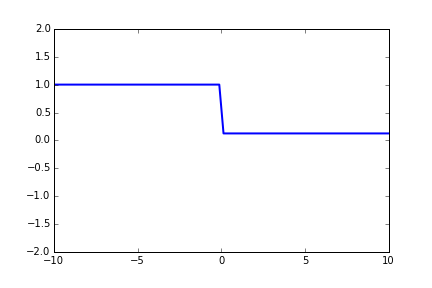
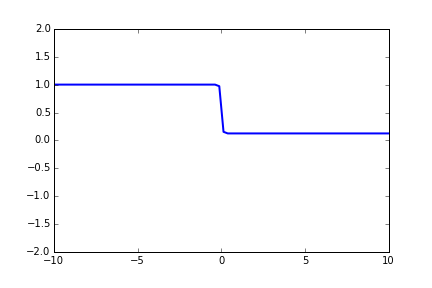
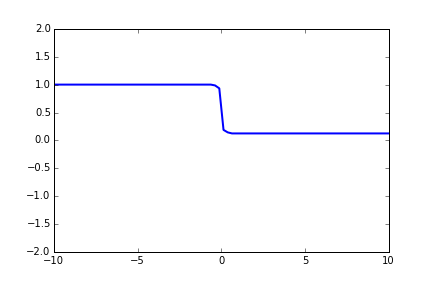
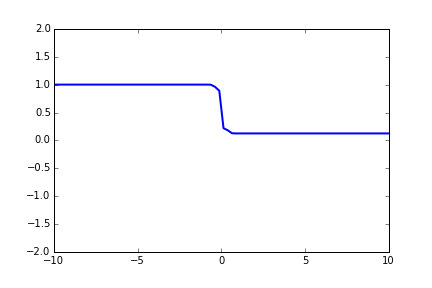
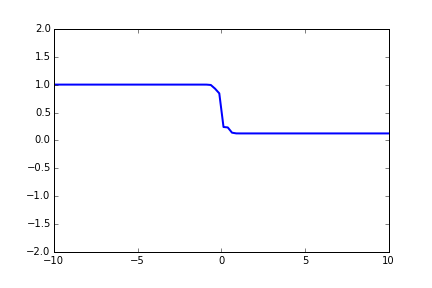
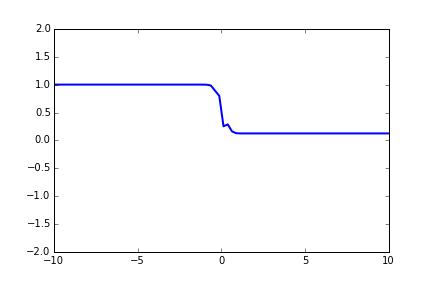
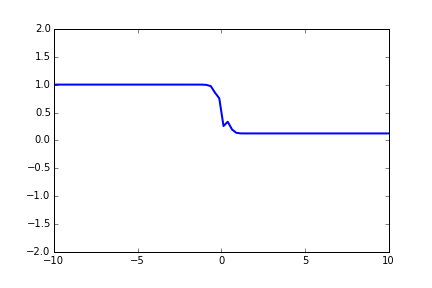
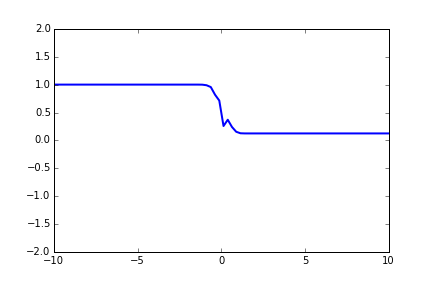
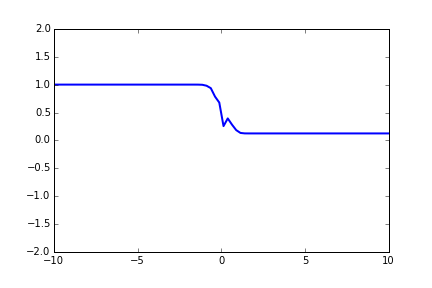
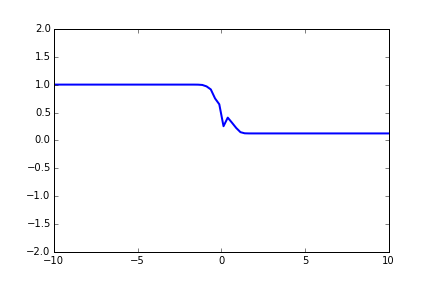
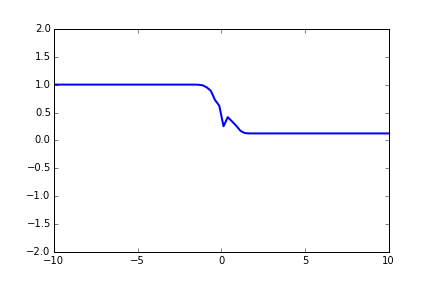
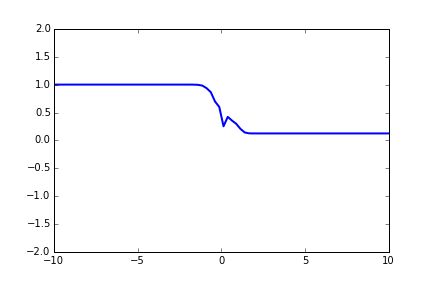
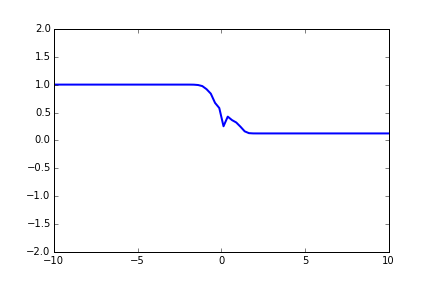
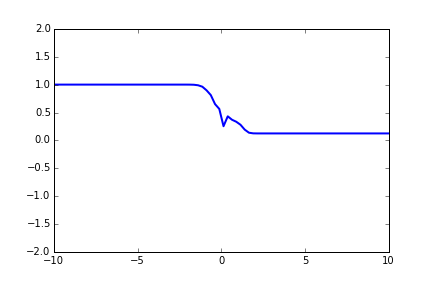
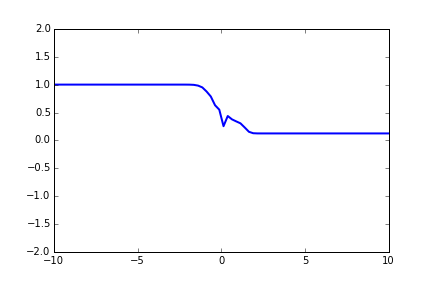
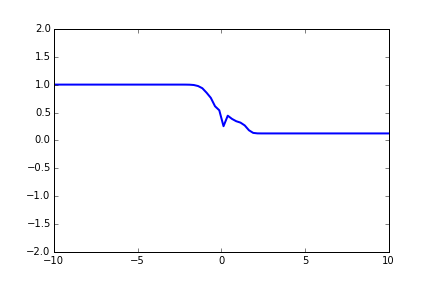
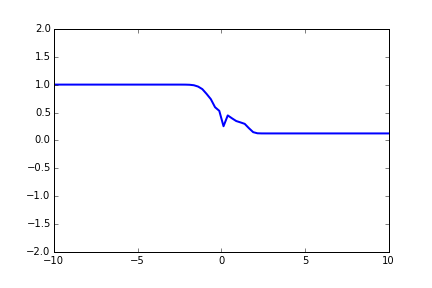
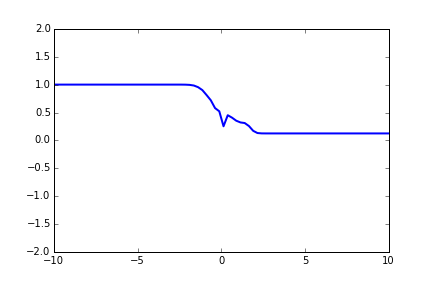
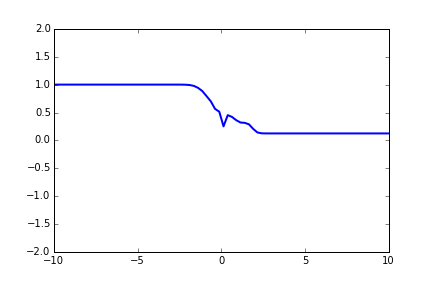
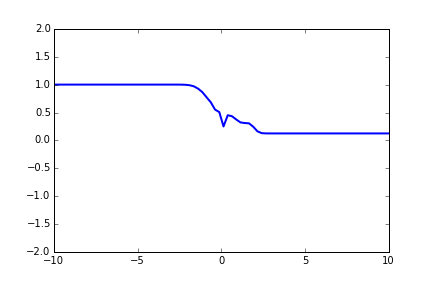
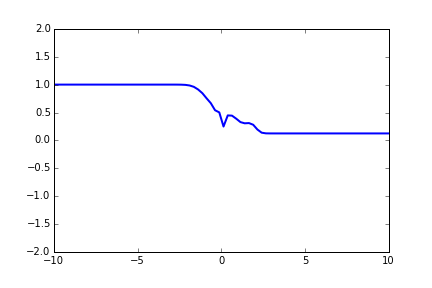
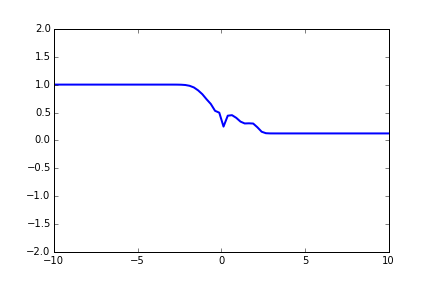
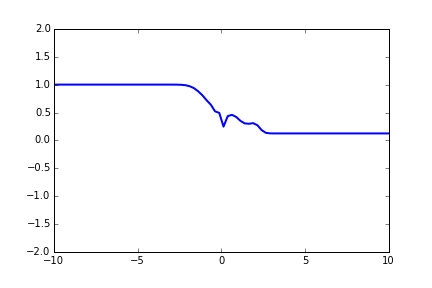
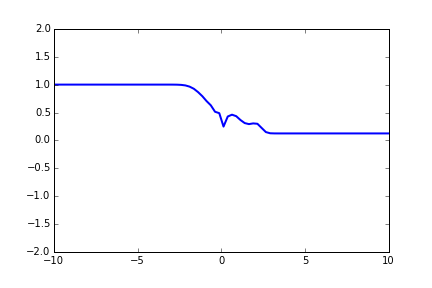
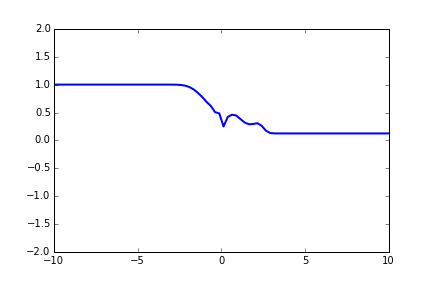
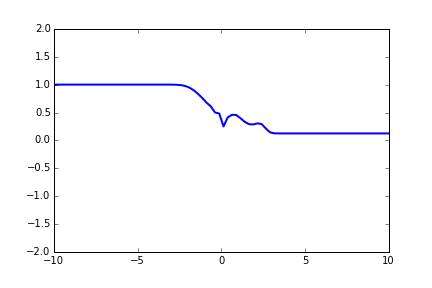
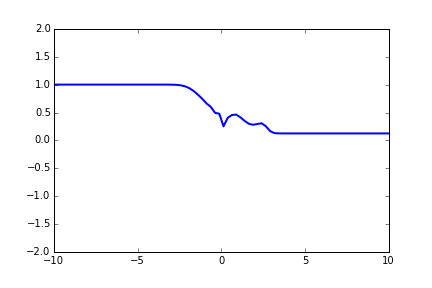
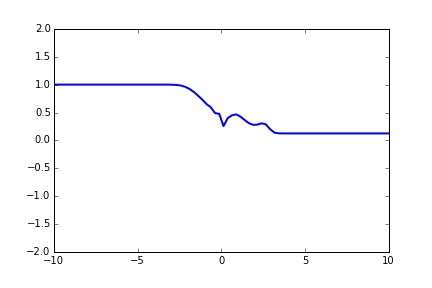
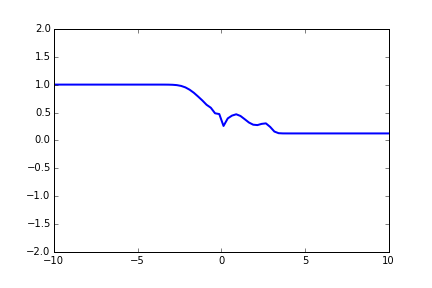
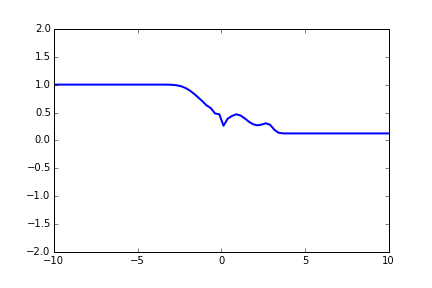
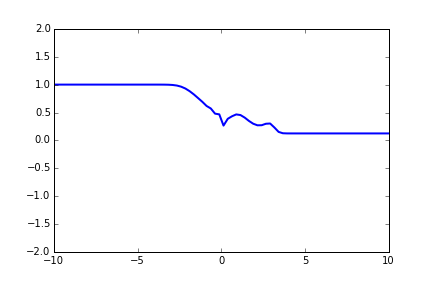
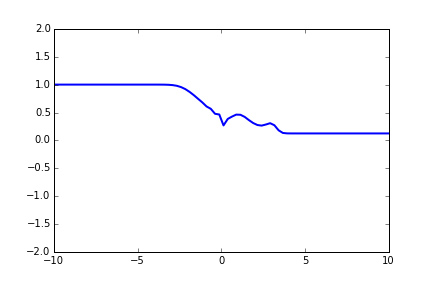
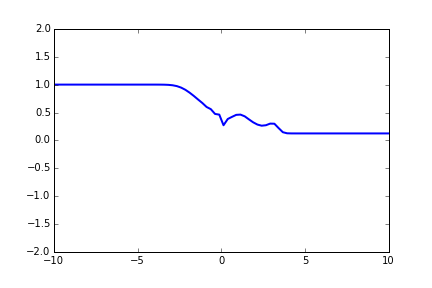
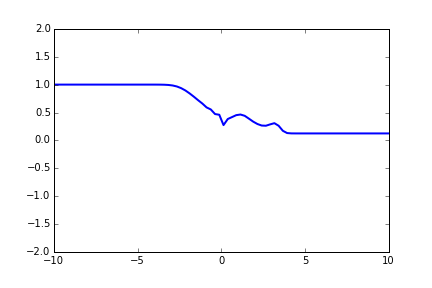
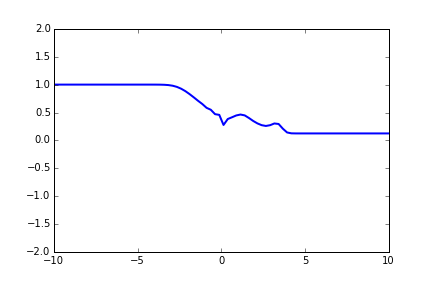
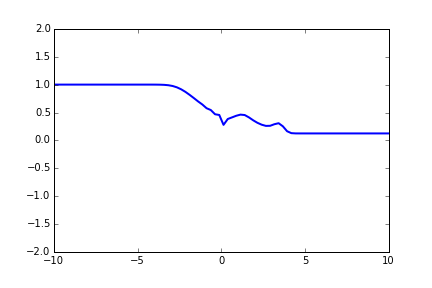
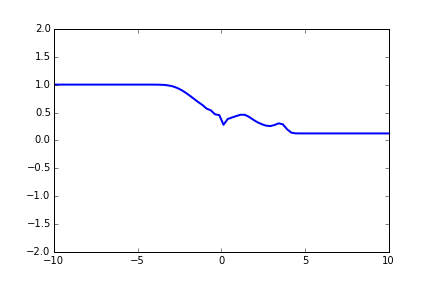
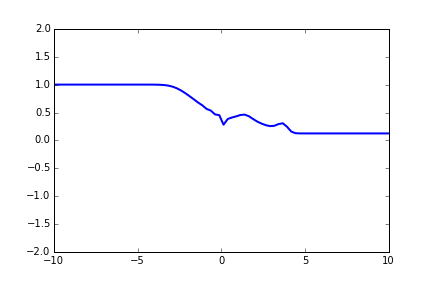
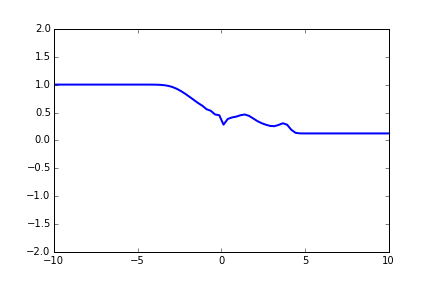
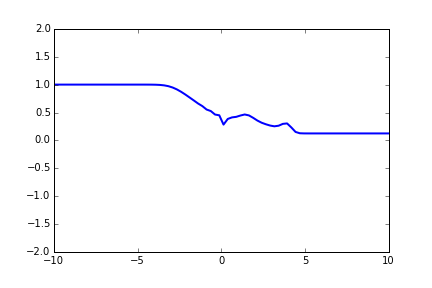
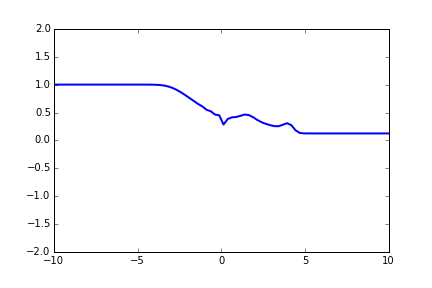
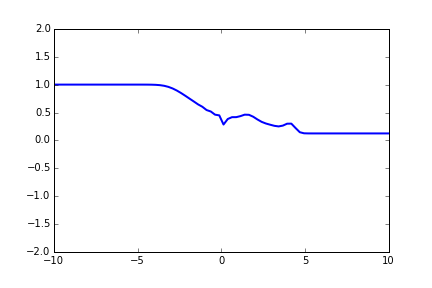
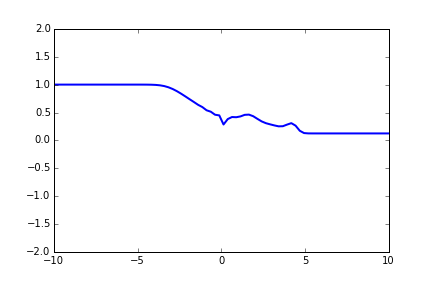
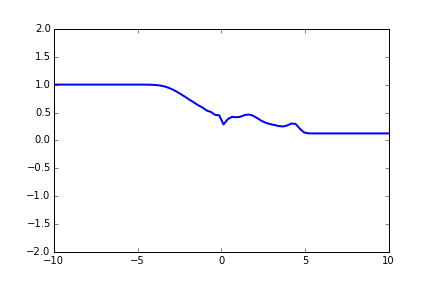
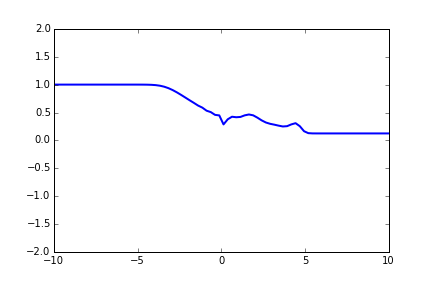
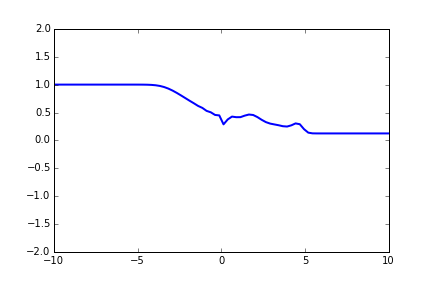
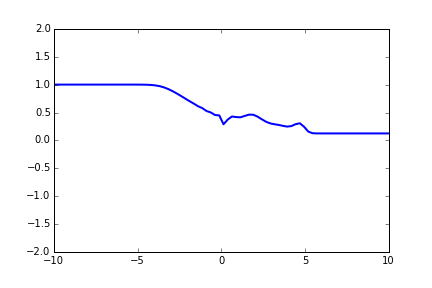
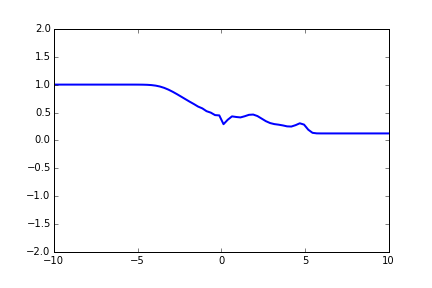
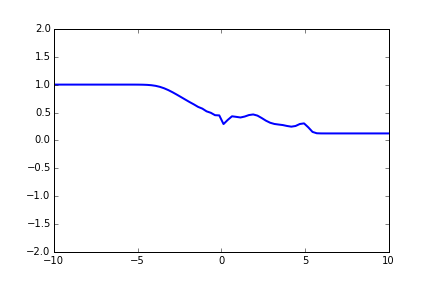
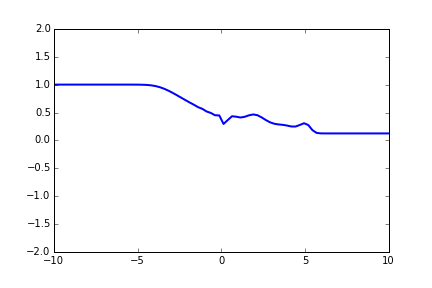
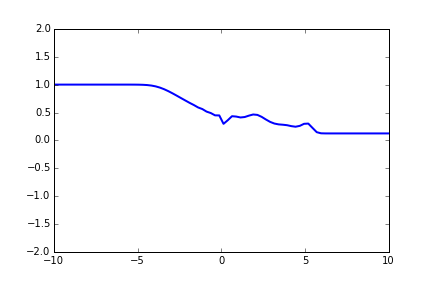

In [472]:
fig = plt.figure();
ax = plt.axes(xlim=(-10,10),ylim=(-2,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un[:,0,:], interval=50)
display_animation(anim, default_mode='once')


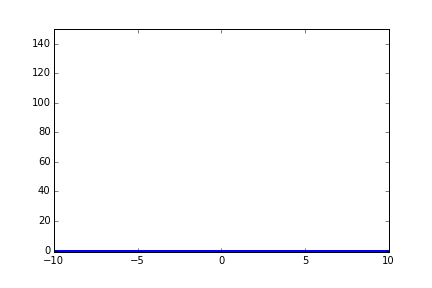
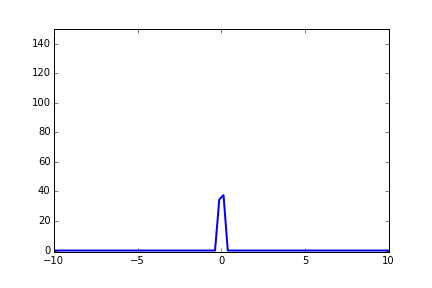
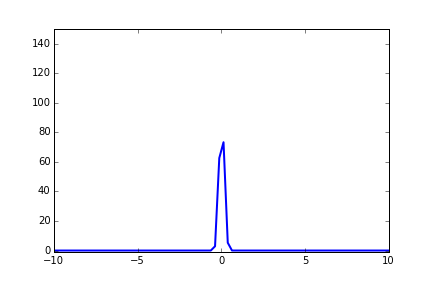
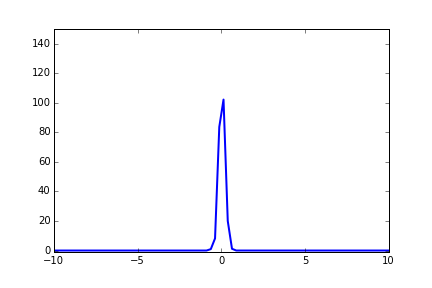
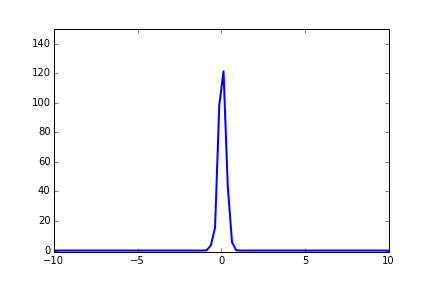
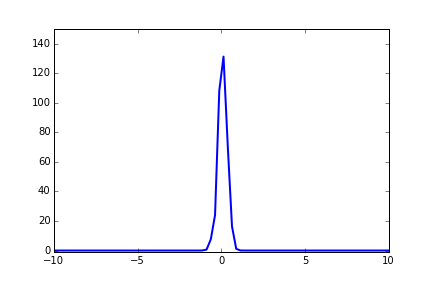
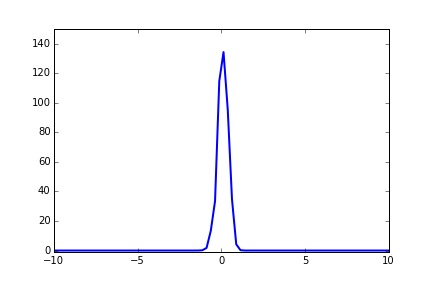
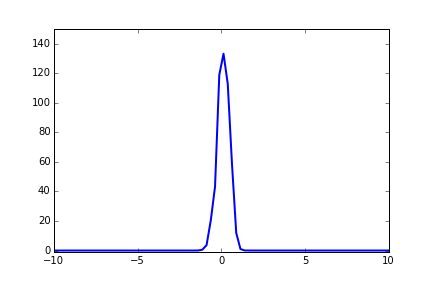
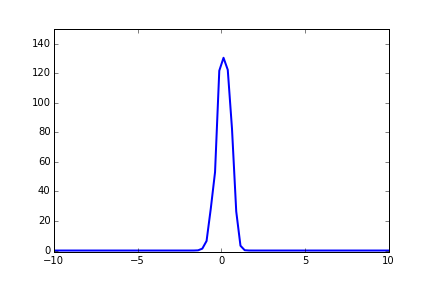
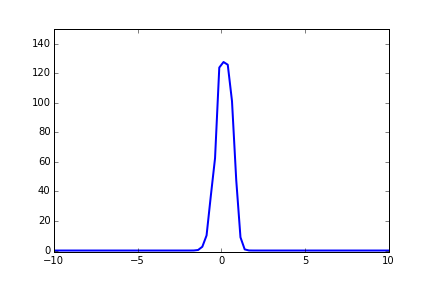
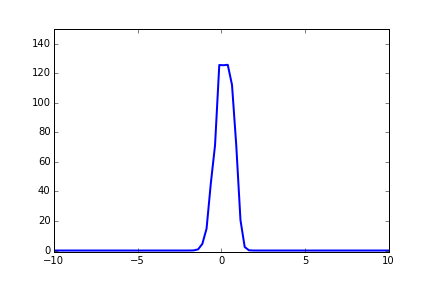
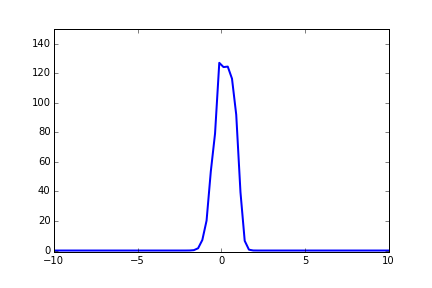
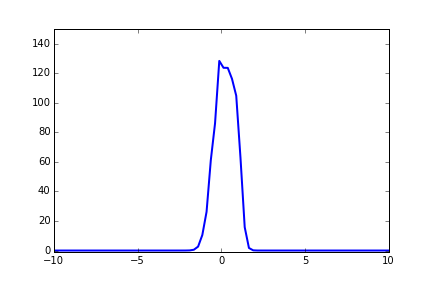
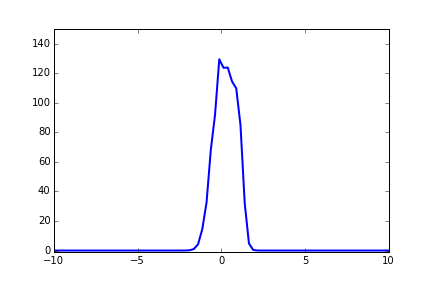
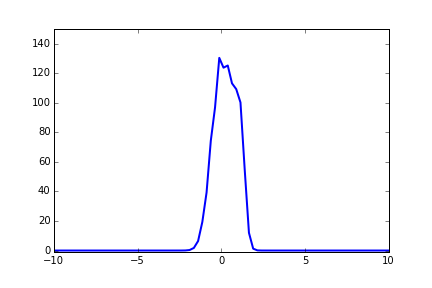
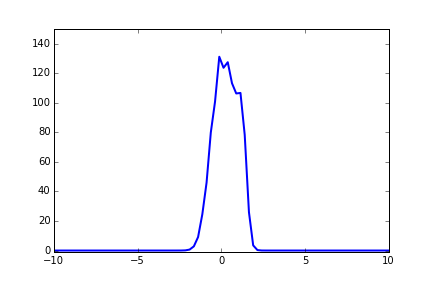
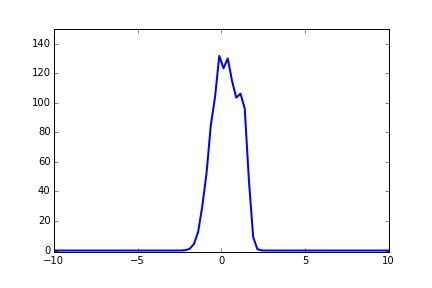
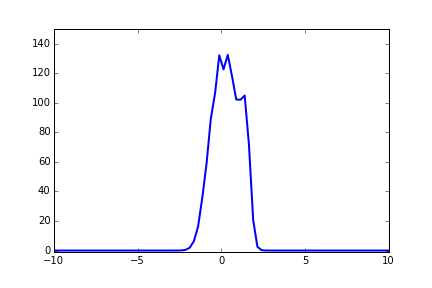
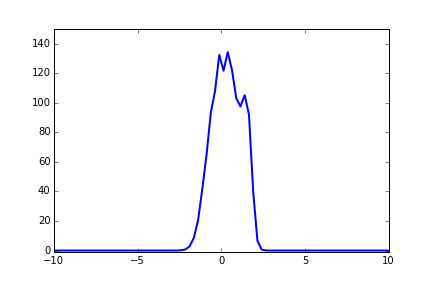
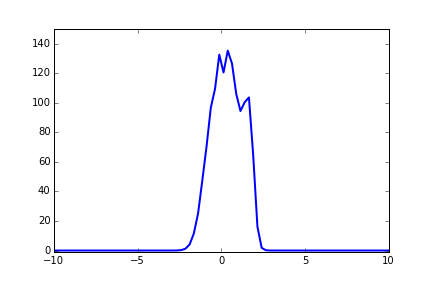
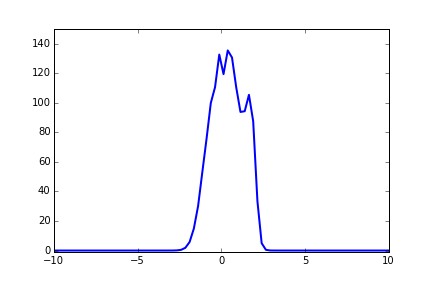
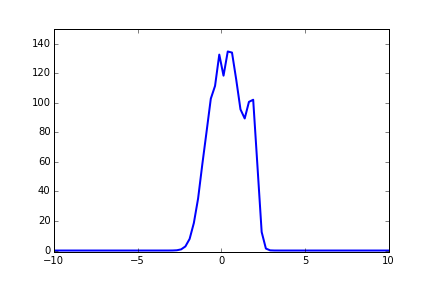
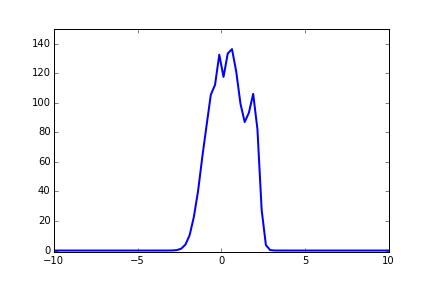
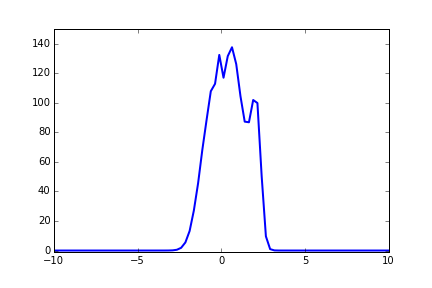
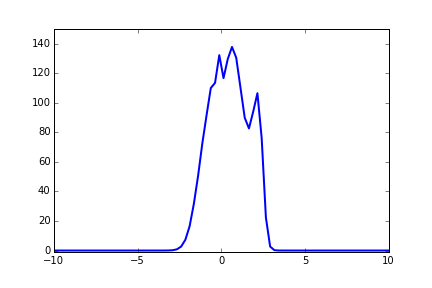
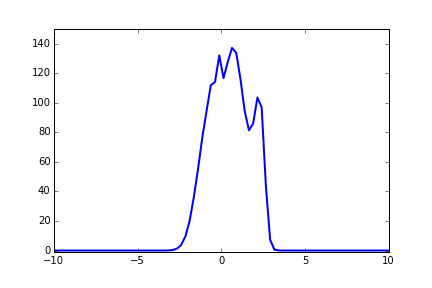
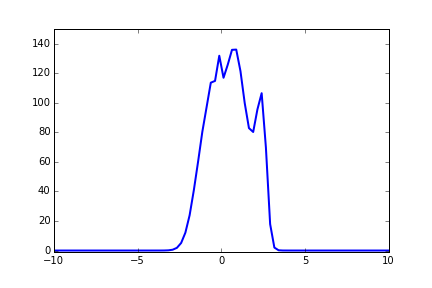
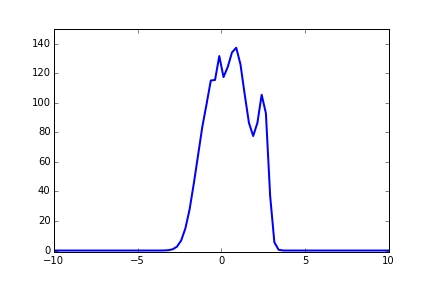
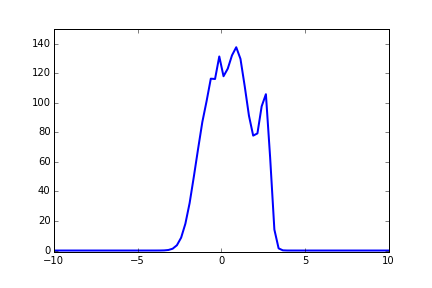
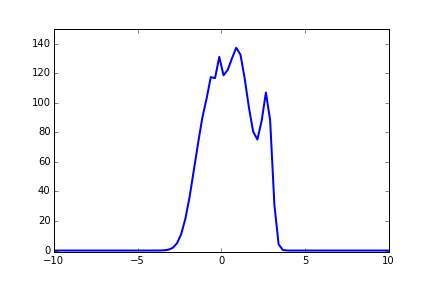
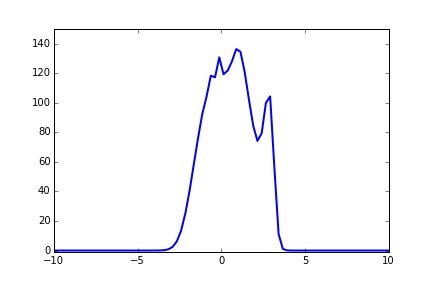
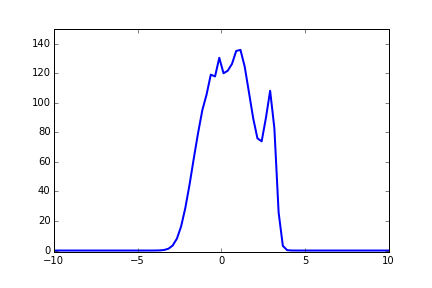
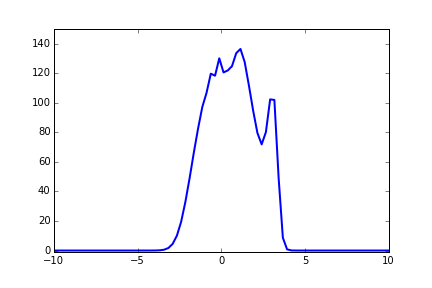
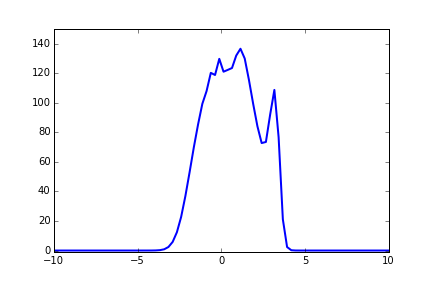
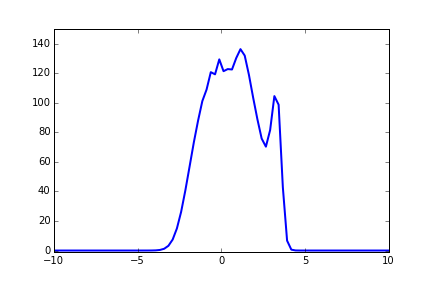
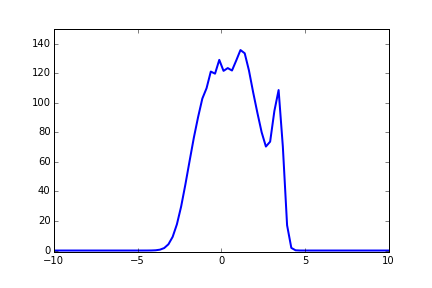
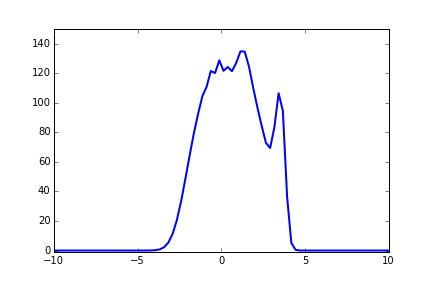
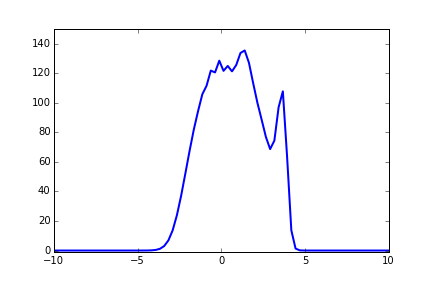
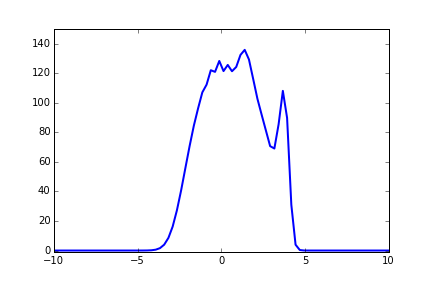
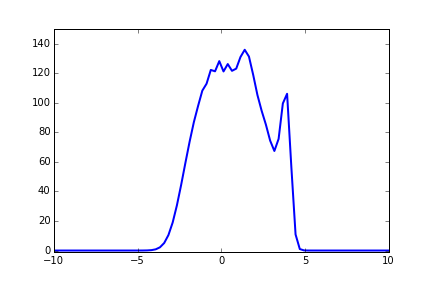
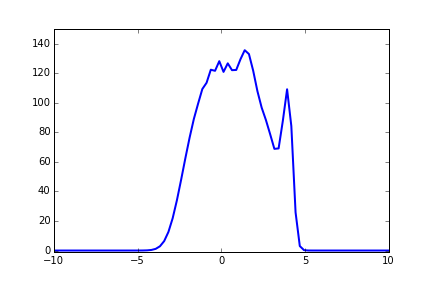
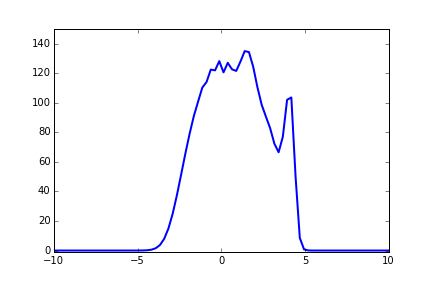
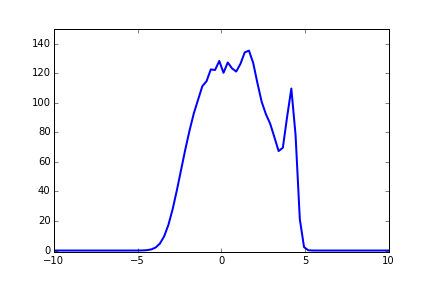
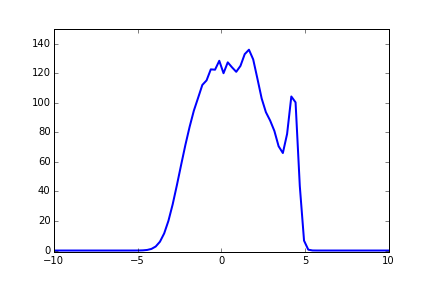
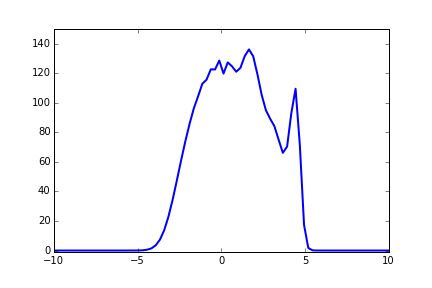
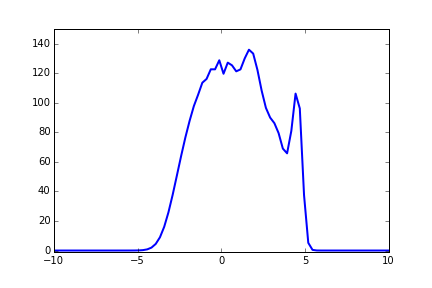
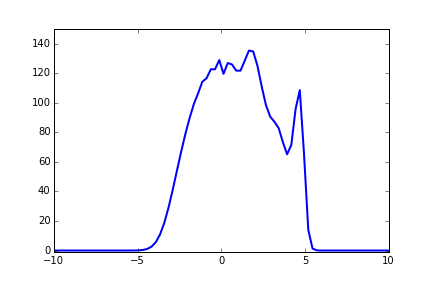
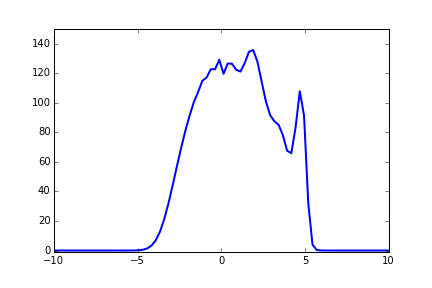
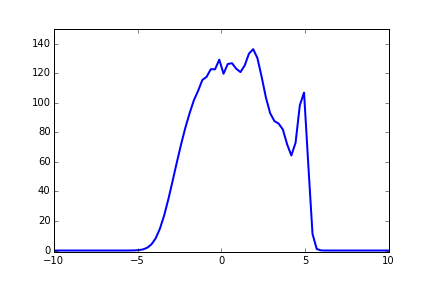
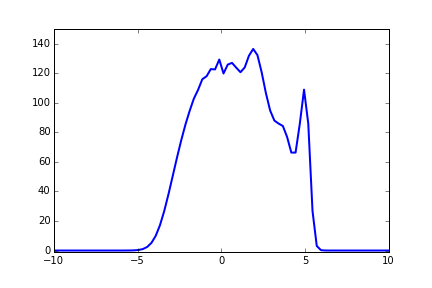
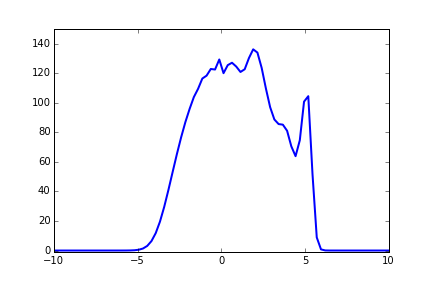

In [473]:
fig = plt.figure();
ax = plt.axes(xlim=(-10,10),ylim=(-1,150));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un[:,1,:], interval=50)
display_animation(anim, default_mode='once')


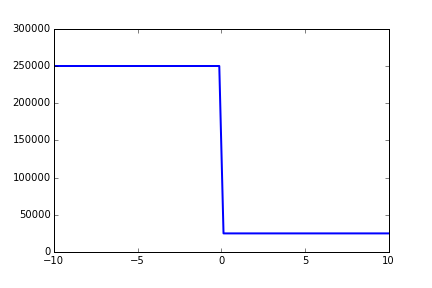
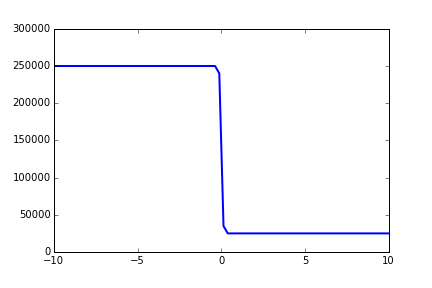
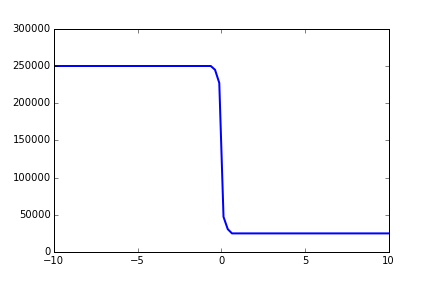
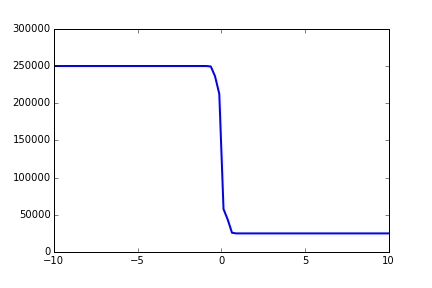
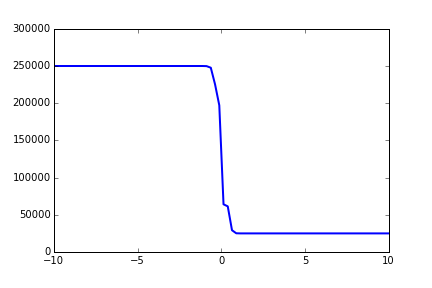
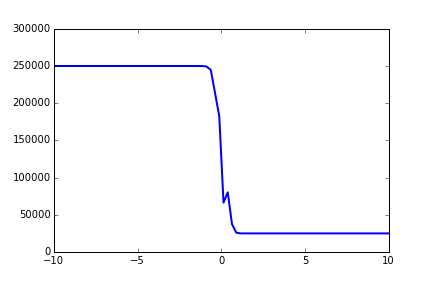
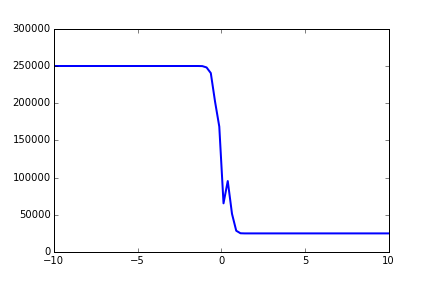
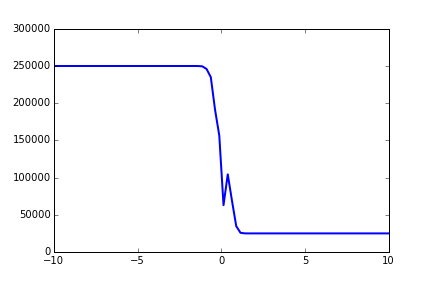
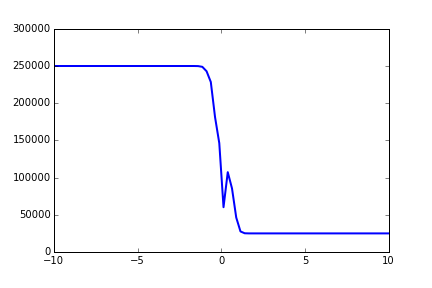
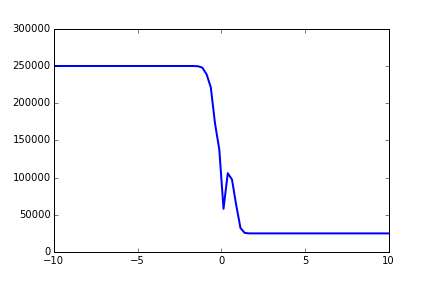
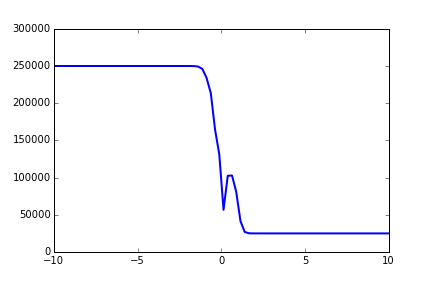
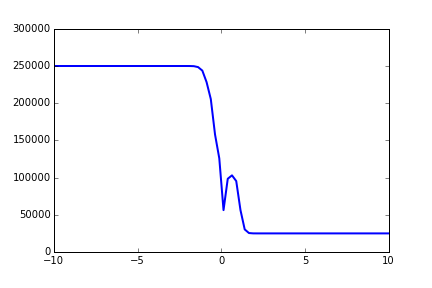
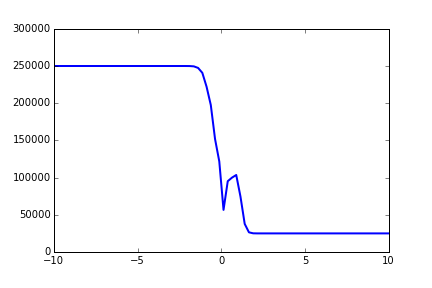
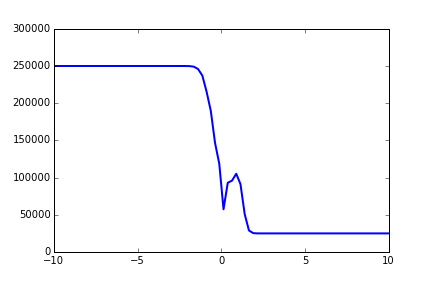
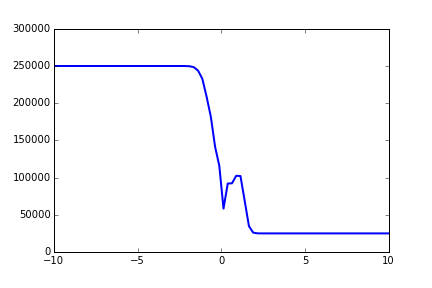
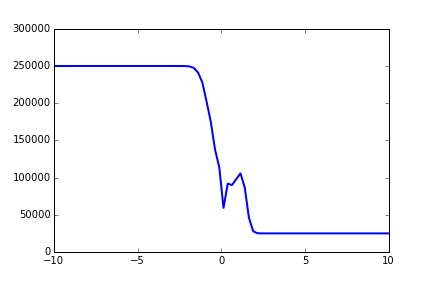
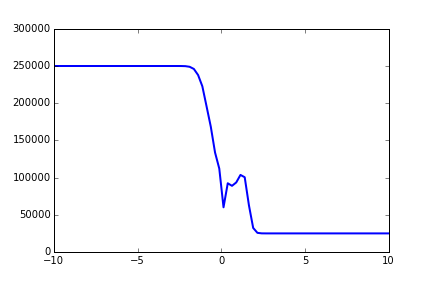
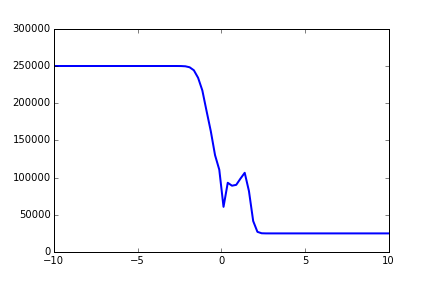
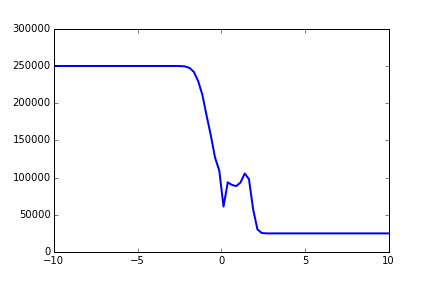
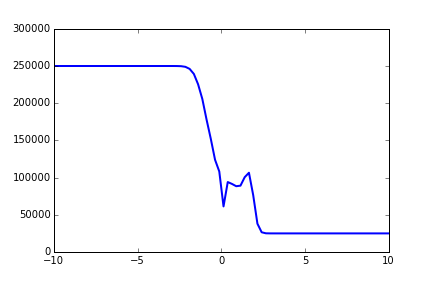
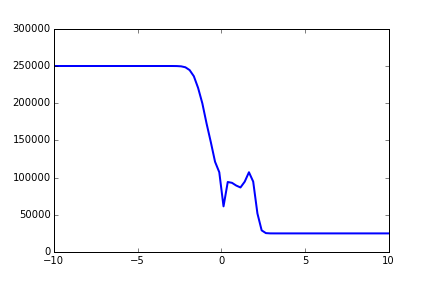
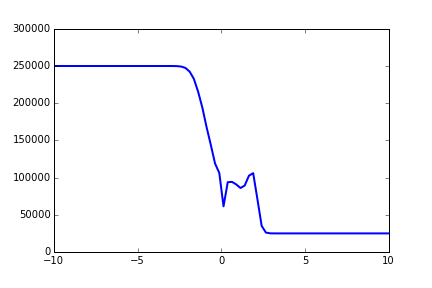
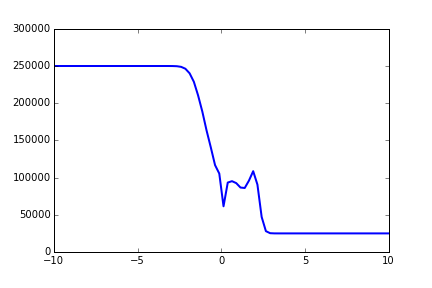
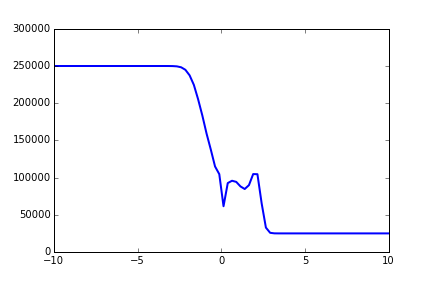
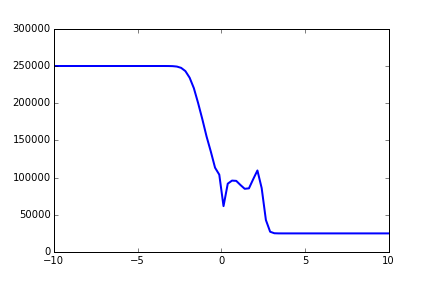
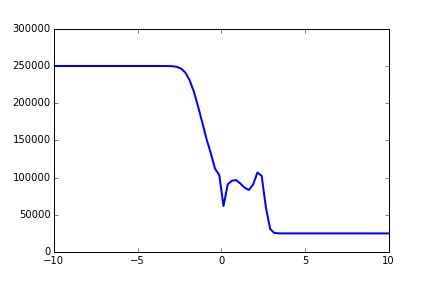
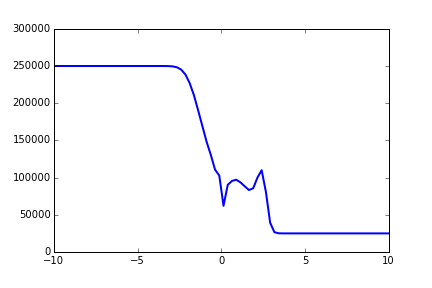
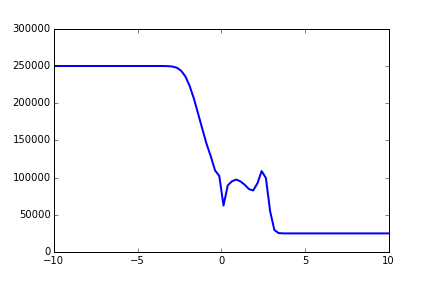
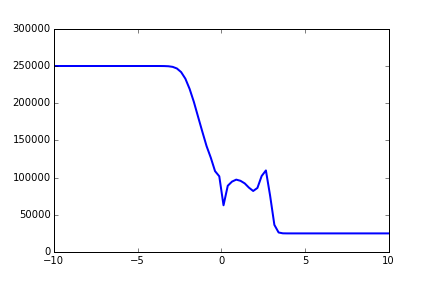
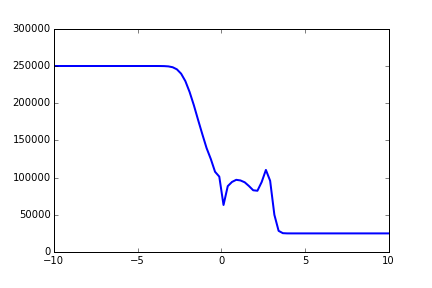
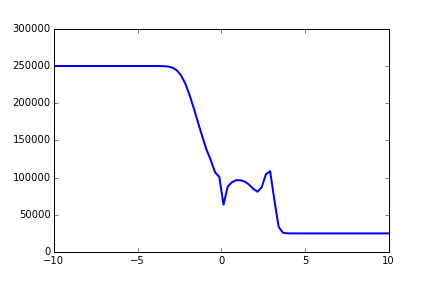
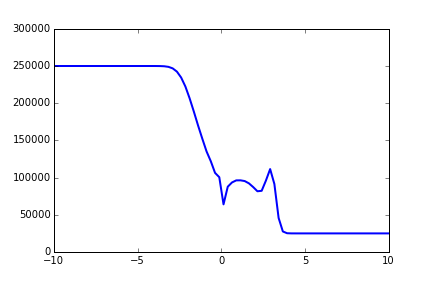
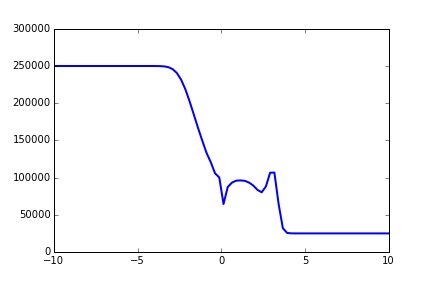
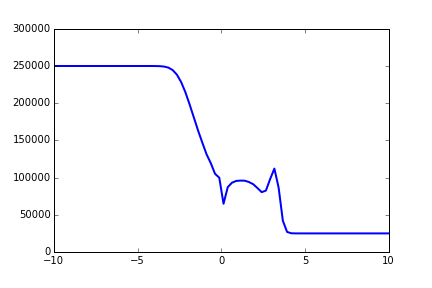
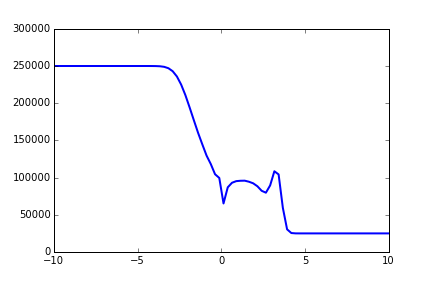
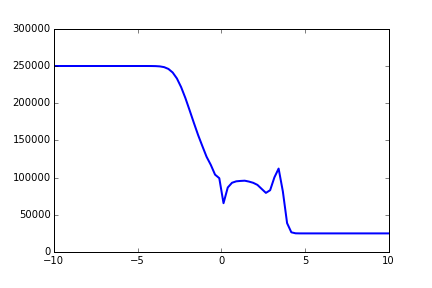
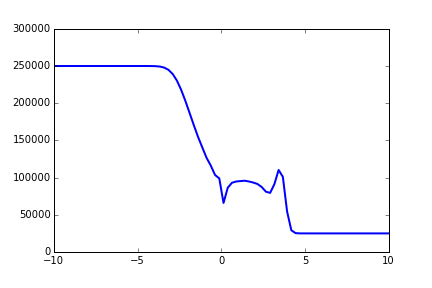
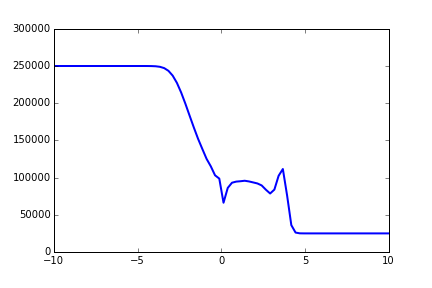
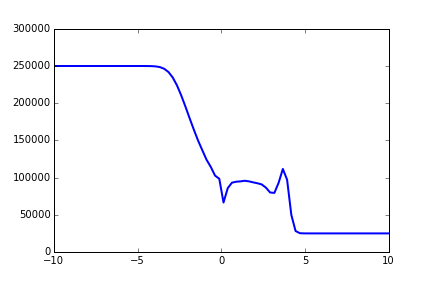
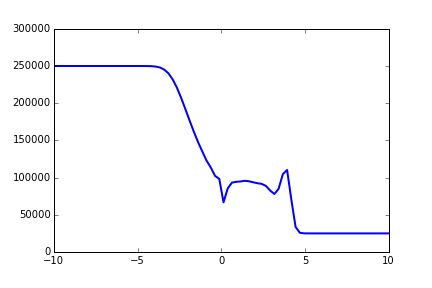
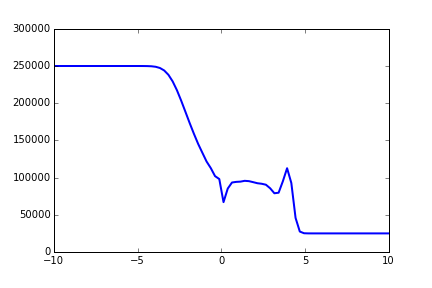
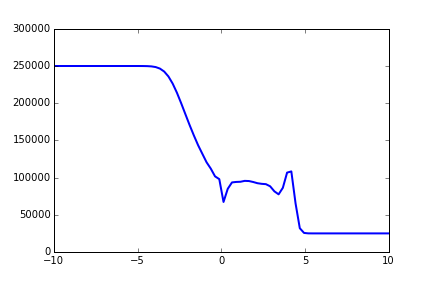
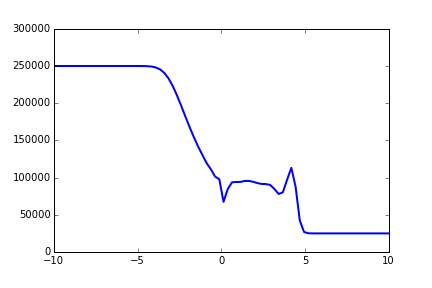
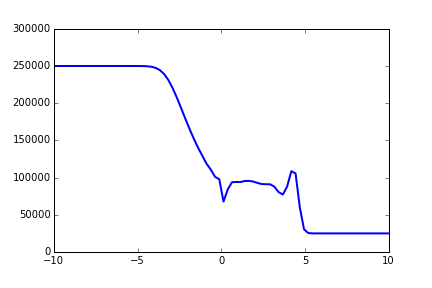
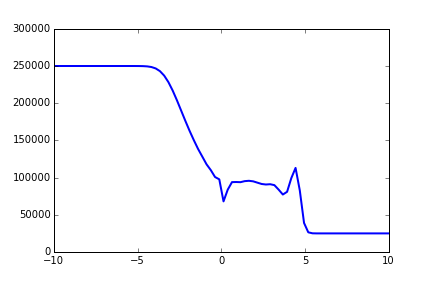
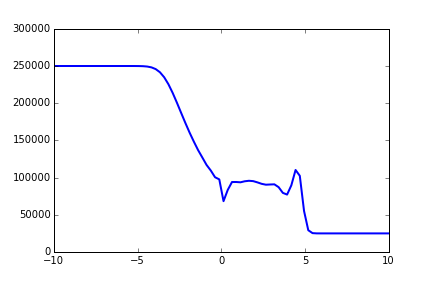
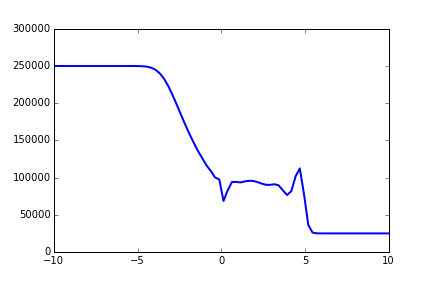
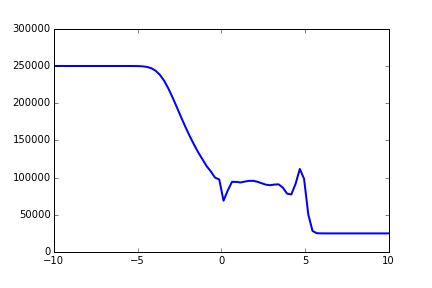
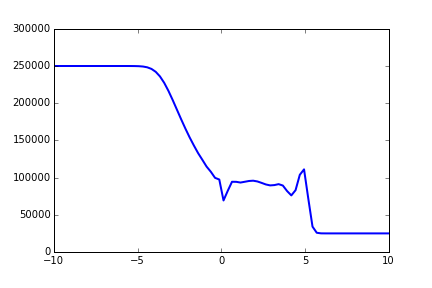
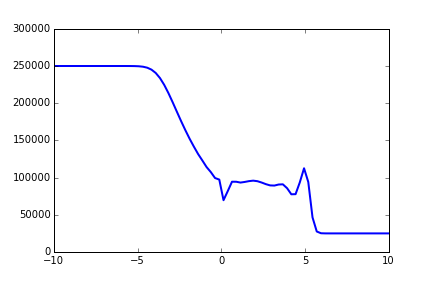
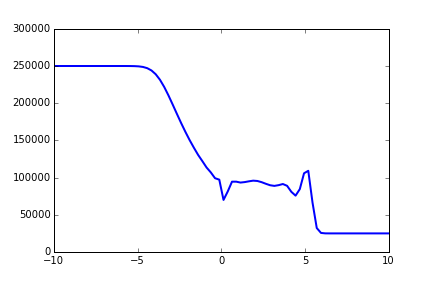

In [474]:
fig = plt.figure();
ax = plt.axes(xlim=(-10,10),ylim=(0,300000));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un[:,2,:], interval=50)
display_animation(anim, default_mode='once')

In [482]:
un[50, 1, 50]/un[50, 0, 50]

292.61147152682651

In [484]:
(gamma - 1)*(un[50, 2, 50] - 0.5*(un[50, 1, 50]**2 / un[50, 0, 50]))

30250.89016757203

In [483]:
un[50, 0, 50]

0.3746914026476012